<a href="https://colab.research.google.com/github/MinaksheeW/UnetWithMultiheadAttention/blob/main/u_net_17_04_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

# Importing necessary libraries
import os
import numpy as np
import tensorflow as tf
from keras.utils import load_img ,img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

import tensorflow as tf
from keras.optimizers import Adam




In [ ]:
import numpy as np
import os
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, LSTM, Reshape, TimeDistributed,Activation,Subtract
from keras.models import Model

import tensorflow as tf
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, Reshape, Permute, MultiHeadAttention,BatchNormalization

In [ ]:
from keras.layers import Conv2DTranspose


The hybrid mode "Multi-head attention based U-net" is trained on BSD500 dataset : https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/

In [ ]:
input1 = '/content/drive/MyDrive/RESIZE_GTSRB'
output1 = '/content/drive/MyDrive/Rain_GTSRB'

input2 = '/content/drive/MyDrive/Test_GTSRB'
output2 = '/content/drive/MyDrive/TestRain_GTSRB'
#add_rain_to_dataset(input2, output2)


In [ ]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

def load_images_from_folder(folder, target_size=(256, 256), extensions=("jpg", "jpeg", "png", "bmp","tif")):
    images = []
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)

        # Skip non-image files
        if not filename.lower().endswith(extensions) or not os.path.isfile(file_path):
            continue

        img = Image.open(file_path)
        img = img.resize(target_size)
        img_array = np.array(img)
        if img_array.shape == (target_size[0], target_size[1], 3):  # Ensure it's an RGB image
            images.append(img_array)
    return np.array(images)

train_folder = "/content/drive/MyDrive/CLEAN_GTSRB"
test_folder = "/content/drive/MyDrive/Test_GTSRB"


x_train_custom = load_images_from_folder(train_folder)
x_test_custom = load_images_from_folder(test_folder)
#x_test_custom1= load_images_from_folder(test_folder1)

# Normalize the images
x_train_custom = x_train_custom.astype('float32') / 255.0
x_test_custom = x_test_custom.astype('float32') / 255.0
#x_test_custom1 = x_test_custom1.astype('float32') / 255.0



# Add noise to the images
noise_factor = 0.1
sigma=15
# Add noise to the images
#x_train_noisy_custom = add_noise(x_train_custom, noise_factor)
#x_test_noisy_custom = add_noise(x_test_custom, noise_factor)
#x_test_noisy_custom1 = add_noise(x_test_custom1, noise_factor,sigma=30)

In [ ]:
#For Gaussian Noise
x_train_custom = load_images_from_folder(train_folder)
x_test_custom = load_images_from_folder(test_folder)
#x_test_custom1= load_images_from_folder(test_folder1)

# Normalize the images
x_train_custom = x_train_custom.astype('float32') / 255.0
x_test_custom = x_test_custom.astype('float32') / 255.0
#x_test_custom1 = x_test_custom1.astype('float32') / 255.0

def add_noise(data, noise_factor, sigma):
    n= np.random.normal(loc=0.0, scale=sigma, size=data.shape)
    data_noisy = data + noise_factor * (n/150)
    return np.clip(data_noisy, 0.0, 1.0)

# Add noise to the images
noise_factor = 0.1
sigma=15
# Add noise to the images
x_train_noisy_custom = add_noise(x_train_custom, noise_factor, sigma)
x_test_noisy_custom = add_noise(x_test_custom, noise_factor,sigma)
#x_test_noisy_custom1 = add_noise(x_test_custom1, noise_factor,sigma=30)

# New Section

In [ ]:
train1_fold = "/content/drive/MyDrive/Rain_GTSRB"
train1 = load_images_from_folder(train1_fold)
train1 = train1.astype('float32')/255.0

test1_fold = "/content/drive/MyDrive/TestRain_GTSRB"
test1 = load_images_from_folder(test1_fold)
test1 = train1.astype('float32')/255.0


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# def apply_motion_blur(image, kernel_size, angle):
#     # Generate motion blur kernel
#     kernel = np.zeros((kernel_size, kernel_size))
#     center = int((kernel_size - 1) / 2)
#     kernel[center, :] = np.ones(kernel_size)
#     kernel = cv2.warpAffine(kernel, cv2.getRotationMatrix2D((center, center), angle, 1.0), (kernel_size, kernel_size))
#     kernel = kernel / kernel_size

#     # Apply motion blur using the kernel
#     blurred_image = cv2.filter2D(image, -1, kernel)
#     return blurred_image

# Load input image
# image_path = "sample_tsr.png"
# image = cv2.imread(image_path)

# Apply motion blur
# blurred_image = apply_motion_blur(image, kernel_size, angle)

# Display the original and blurred images using matplotlib
# plt.figure(figsize=(10, 6))
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# plt.axis("off")

# plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
# plt.title("Motion Blurred Image")
# plt.axis("off")

# plt.show()

source_path = "/content/drive/MyDrive/CLEAN_GTSRB"
dest_path = "/content/drive/MyDrive/dset1/motionBlurTrain/train"

kernel_size = 5
angle = 45

for root, dirs, files in os.walk(source_path) :
    for file in files :
        print(file)
        image = cv2.imread(os.path.join(root, file))

        kernel = np.zeros((kernel_size, kernel_size))
        center = int((kernel_size - 1) / 2)
        kernel[center, :] = np.ones(kernel_size)
        kernel = cv2.warpAffine(kernel, cv2.getRotationMatrix2D((center, center), angle, 1.0), (kernel_size, kernel_size))
        kernel = kernel / kernel_size

        blurred_image = cv2.filter2D(image, -1, kernel)

        print(cv2.imwrite(f"{dest_path}\\{file}", blurred_image))

In [ ]:
train1_blur = "/content/drive/MyDrive/dset1/motionBlurTrainResized/train"
trainBlur = load_images_from_folder(train1_blur)
trainBlur = trainBlur.astype('float32')/255.0

test1_blur = "/content/drive/MyDrive/dset1/motionBlurTestResized"
testBlur = load_images_from_folder(test1_blur)
testBlur = testBlur.astype('float32')/255.0

This code demonstrates the implementation of a modified U-Net, a deep learning model for image denoising. The code is written in Python using the TensorFlow library, specifically Keras API for building the model. The U-Net architecture is a type of Convolutional Neural Network (CNN) initially designed for biomedical image segmentation. It has an encoder-decoder structure, which allows it to learn and extract features from noisy images and generate denoised images. This implementation also includes a MultiHeadAttention layer, which enhances the model's ability to capture long-range dependencies in the image.

Importing necessary libraries and modules:
The code starts by importing necessary libraries such as os, numpy, Image (from PIL), and various TensorFlow components.

Dataset loading and preprocessing:
This part of the code is not provided but is supposed to load and preprocess the dataset. Preprocessing usually involves resizing the images, normalizing pixel values, and creating noisy versions of the images for training and testing.

Defining the conv_block function:
This function defines a standard convolutional block with two Conv2D layers, each followed by a ReLU activation function. The block is used multiple times in the U-Net architecture.

Defining the U-Net model:
The unet function constructs the U-Net architecture, which consists of an encoder (downsampling) path and a decoder (upsampling) path. The encoder path uses a series of conv_blocks and MaxPooling2D layers to learn the image features at different scales. A MultiHeadAttention layer is added after the third conv_block to improve the model's ability to capture long-range dependencies. The decoder path uses UpSampling2D layers and concatenation to combine the features from the encoder path with the upsampled features, followed by conv_blocks. The final output layer is a Conv2D layer with three filters and a sigmoid activation function, generating the denoised image.

Compiling and training the model:
The U-Net model is instantiated with an input shape of (256, 256, 3), implying that the input images are 256x256 pixels with three color channels (RGB). The model is compiled with the Adam optimizer and Mean Squared Error (MSE) as the loss function. MSE is a suitable choice for image denoising as it measures the difference between the denoised output and the original clean image. The model is then trained using the fit method with the custom noisy and clean image datasets, with 30 epochs, a batch size of 8, shuffling enabled, and validation data provided.

In summary, the code demonstrates how to build and train a modified U-Net model for image denoising. The model learns to extract features from noisy images and generate denoised images by leveraging its encoder-decoder structure and the additional MultiHeadAttention layer. The model is trained using the custom dataset of noisy and clean images, with the goal of minimizing the mean squared error between the denoised output and the original clean image.

Epoch 1/60
152/152 [==============================] - 37s 197ms/step - loss: 0.0099 - accuracy: 0.6947 - val_loss: 5.4570e-04 - val_accuracy: 0.8139
Epoch 2/60
152/152 [==============================] - 29s 193ms/step - loss: 0.0011 - accuracy: 0.7909 - val_loss: 2.5504e-04 - val_accuracy: 0.8476
Epoch 3/60
152/152 [==============================] - 29s 194ms/step - loss: 3.1558e-04 - accuracy: 0.8353 - val_loss: 1.4379e-04 - val_accuracy: 0.8828
Epoch 4/60
152/152 [==============================] - 29s 194ms/step - loss: 2.9684e-04 - accuracy: 0.8719 - val_loss: 1.2867e-04 - val_accuracy: 0.8822
Epoch 5/60
152/152 [==============================] - 29s 194ms/step - loss: 2.0830e-04 - accuracy: 0.8691 - val_loss: 8.5165e-05 - val_accuracy: 0.9106
Epoch 6/60
152/152 [==============================] - 29s 194ms/step - loss: 2.6844e-04 - accuracy: 0.8601 - val_loss: 7.6383e-05 - val_accuracy: 0.9014
Epoch 7/60
152/152 [==============================] - 29s 194ms/step - loss: 1.2997e-04 - 

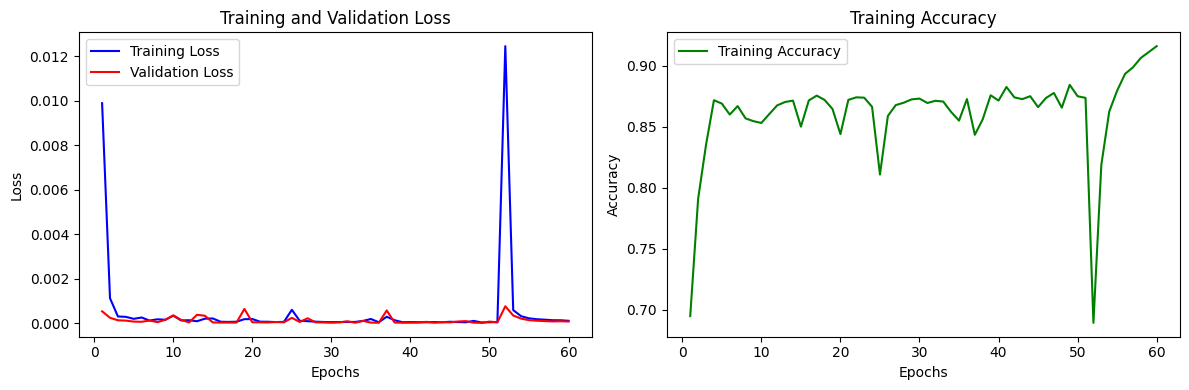

In [ ]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, MultiHeadAttention
from keras.models import Model
import tensorflow as tf
import matplotlib.pyplot as plt

# (Your dataset loading and preprocessing code here)

def conv_block(x, filters):
    x = Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
    return x

def unet(input_shape):
    inputs = Input(input_shape)

    c1 = conv_block(inputs, 32)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = conv_block(p1, 64)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = conv_block(p2, 128)

    # Add the multihead attention layer after the third convolutional block
    attn = MultiHeadAttention(num_heads=4, key_dim=128)(c3, c3)
    c3 = tf.keras.layers.Add()([c3, attn])

    p3 = MaxPooling2D((2, 2))(c3)

    c4 = conv_block(p3, 256)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = conv_block(p4, 512)

    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c4])
    c6 = conv_block(u6, 256)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c3])
    c7 = conv_block(u7, 128)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c2])
    c8 = conv_block(u8, 64)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = concatenate([u9, c1])
    c9 = conv_block(u9, 32)

    output = Conv2D(3, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs, output)
    return model

unet_model = unet((256, 256, 3))
unet_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = unet_model.fit(x_train_noisy_custom, x_train_custom,
               epochs=60,
               batch_size=8,
               shuffle=True,
               validation_data=(x_test_noisy_custom, x_test_custom))


# Obtain loss, accuracy, and validation loss values from the history object
loss_values = history.history['loss']
accuracy_values = history.history['accuracy']
val_loss_values = history.history['val_loss']

# Plot the loss, accuracy, and validation loss values against epochs
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b-', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, 'g-', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



Combining multi-head attention with U-Net architecture can be beneficial for image denoising due to their complementary strengths. U-Net is a popular convolutional neural network (CNN) architecture for image segmentation and denoising, while multi-head attention is a mechanism used in transformer models to capture long-range dependencies in data. By combining the two, you can achieve better denoising performance.

Here are some reasons why this combination is advantageous:

Hierarchical feature learning: U-Net's encoder-decoder architecture allows it to learn hierarchical features at different scales, making it effective at capturing both local and global structures in images. This is important for denoising, as noise can manifest at various spatial scales.

Long-range dependencies: Multi-head attention can capture long-range dependencies in the input data by allowing the model to weigh the importance of different regions of the image based on their contextual relationships. This can help identify and preserve relevant structures while suppressing noise.

Context-aware denoising: By integrating multi-head attention into U-Net, the model can better understand the contextual information in the input image. This allows the model to adaptively denoise different regions based on their surrounding context, leading to more accurate denoising results.

Improved generalization: The attention mechanism can help the model to focus on relevant features and ignore irrelevant ones. This can lead to better generalization and improved performance on diverse types of noise.

Parallelization and efficiency: Multi-head attention enables parallel processing of different regions in the input image, which can lead to more efficient training and inference compared to traditional convolutional layers.

To implement multi-head attention within a U-Net architecture, you can replace some of the convolutional layers with attention modules or add attention modules in parallel with the convolutional layers. This way, the model can leverage both the spatial and contextual information from the image for more effective denoising.

The hybrid mode "Multi-head attention based U-net" is tested on BSD68 dataset

In [ ]:
def add_noise(data, noise_factor, sigma):
    n = np.random.normal(loc=0.0, scale=sigma, size=data.shape)
    data_noisy = data + noise_factor * (n/25)
    return np.clip(data_noisy, 0.0, 1.0)

The code snippet provided defines two evaluation metrics, Peak Signal-to-Noise Ratio (PSNR) and Structural Similarity Index (SSIM), for assessing the performance of the denoising model on the test dataset. These metrics are commonly used to evaluate image restoration tasks such as denoising, as they measure the similarity between the denoised images and the original clean images.

Defining the compute_psnr function:
This function takes two arguments, the original clean image and the denoised image, and computes the PSNR between them using the peak_signal_noise_ratio function. PSNR is a measure of the quality of a denoised image compared to the original image. A higher PSNR indicates better denoising performance, with fewer artifacts and distortions in the output image.

Defining the compute_ssim function:
This function takes the same input arguments as compute_psnr but computes the SSIM between the images using the structural_similarity function. SSIM is a perception-based model that considers image degradation as perceived change in structural information. It measures the similarity between two images, with values in the range of -1 to 1. A higher SSIM value (closer to 1) indicates better denoising performance and greater structural similarity between the denoised image and the original image.

Denoising the test dataset:
The code first demonstrates how to denoise the entire test dataset using the predict method. However, it then shows an alternative approach that denoises the test images one at a time using a loop. This is done by expanding the dimensions of each image to add a batch dimension and then removing it after denoising.

Computing PSNR and SSIM for each test image:
Two empty lists (psnrs and ssims) are created to store the PSNR and SSIM values for each denoised test image. A loop iterates through the denoised test images, computing the PSNR and SSIM between each denoised image and the corresponding original clean image using the previously defined functions. The computed values are appended to their respective lists.

Computing the average PSNR and SSIM:
The mean values of the PSNR and SSIM lists are computed using numpy's mean function. These average values provide an overall assessment of the denoising model's performance on the test dataset.

Printing the average PSNR and SSIM:
The average PSNR and SSIM values are printed to display the performance of the denoising model. Higher values for both metrics indicate better denoising performance.

In summary, the code snippet demonstrates how to evaluate the performance of an image denoising model using PSNR and SSIM metrics. The model's predictions on the test dataset are compared to the original clean images to compute these metrics. The average PSNR and SSIM values provide an overall assessment of the model's denoising performance.

In [ ]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity


In [ ]:
test_folder1 = "/content/drive/MyDrive/Test_GTSRB"
x_test_custom1= load_images_from_folder(test_folder1)
x_test_custom1 = x_test_custom1.astype('float32') / 255.0

The hybrid mode "Multi-head attention based U-net" is tested on McMaster

sigma=75

In [ ]:
import matplotlib.pyplot as plt

noise_factor = 0.028
sigma=75
x_test_noisy_custom2 = add_noise(x_test_custom1, noise_factor,sigma)

In [ ]:

def compute_psnr(original, denoised):
    return peak_signal_noise_ratio(original, denoised)

def compute_ssim(original, denoised):
    return structural_similarity(original, denoised, multichannel=True)

# Use the model to denoise the test dataset
#x_test_denoised = unet_model.predict(x_test_noisy_custom)
# Use the model to denoise the test dataset one image at a time


x_test_denoised = []

for i in range(len(x_test_noisy_custom2)):
    img = x_test_noisy_custom2[i]
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    denoised_img = unet_model.predict(img)
    denoised_img = np.squeeze(denoised_img, axis=0)  # Remove the batch dimension
    x_test_denoised.append(denoised_img)

x_test_denoised = np.array(x_test_denoised)


# Compute the PSNR and SSIM for each test image and store them in lists
psnrs = []
ssims = []

for i in range(len(x_test_denoised)):
    original = x_test_custom1[i]
    denoised = x_test_denoised[i]
    psnrs.append(compute_psnr(original, denoised))
    ssims.append(compute_ssim(original, denoised))

# Compute the average PSNR and SSIM for the test dataset
average_psnr = np.mean(psnrs)
average_ssim = np.mean(ssims)

print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)

1/1 [==============================] - 0s 21ms/step


<ipython-input-34-eeee5cd81214>:5: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(original, denoised, multichannel=True)


Average PSNR: 31.22963157971232
Average SSIM: 0.8890466


1/1 [==============================] - 0s 23ms/step


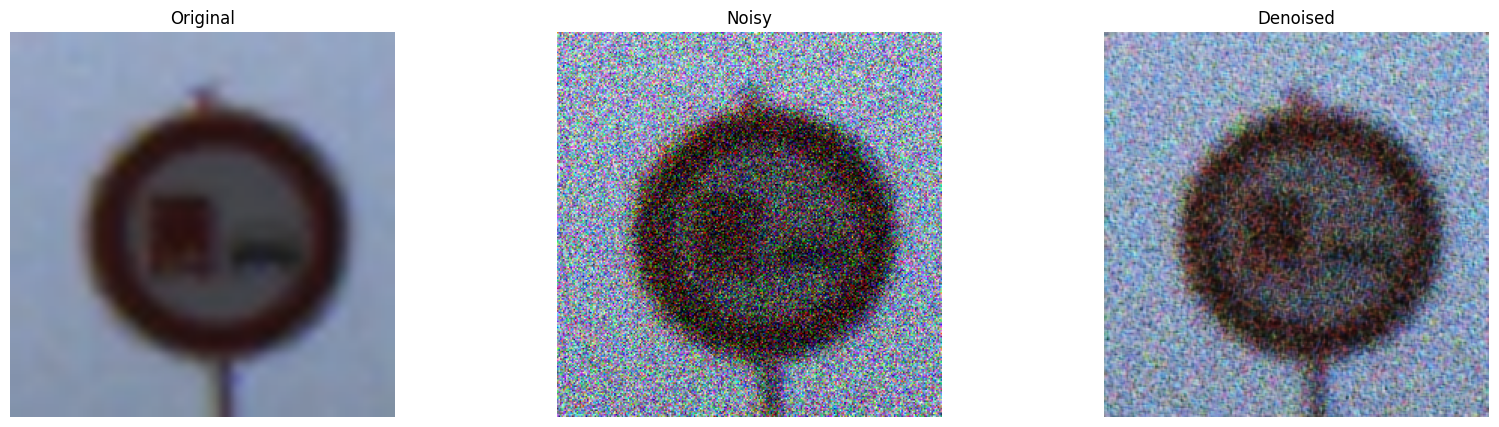

1/1 [==============================] - 0s 21ms/step


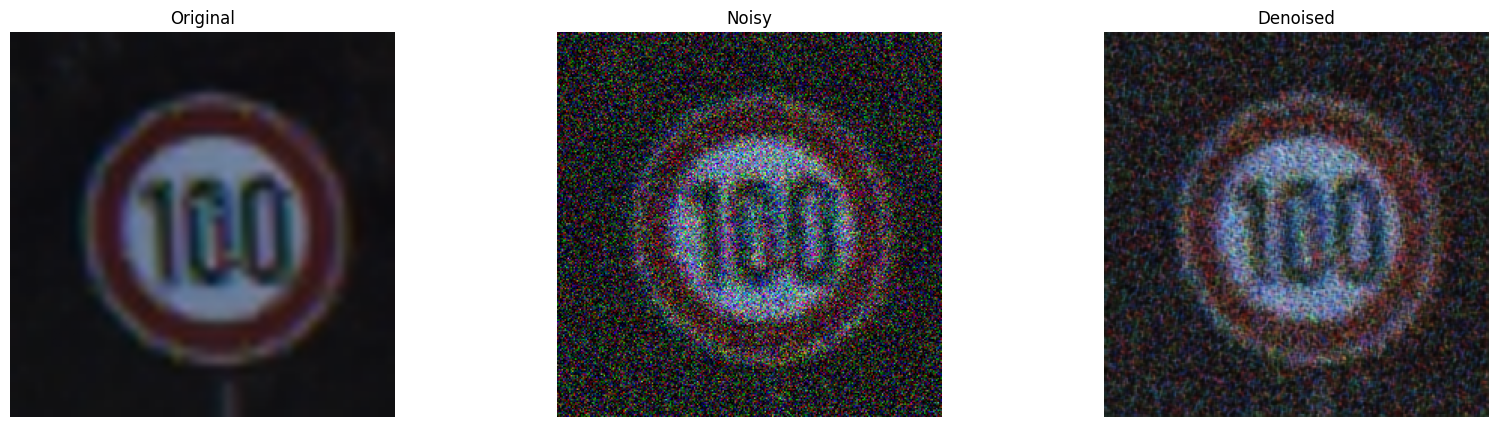

In [ ]:
import matplotlib.pyplot as plt

noise_factor = 0.2

x_test_noisy_custom1 = add_noise(x_test_custom1, noise_factor,sigma=30)
x_test_noisy_custom2 = add_noise(x_test_custom1, noise_factor,sigma)

#x_test_noisy_custom1 = "/content/drive/MyDrive/dset1/motionBlurTestResized"
#x_test_noisy_custom2 = "/content/drive/MyDrive/dset1/motionBlurTestResized"

def plot_images(original, noisy, denoised):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].imshow(original)
    axes[0].set_title("Original")
    axes[0].axis("off")
    axes[1].imshow(noisy)
    axes[1].set_title("Noisy")
    axes[1].axis("off")
    axes[2].imshow(denoised)
    axes[2].set_title("Denoised")
    axes[2].axis("off")
    plt.show()

# Test the trained model on a custom test image
test_image_idx = np.random.randint(0, len(x_test_custom1))
original_img_custom = x_test_custom1[test_image_idx]
noisy_img_custom2 = x_test_noisy_custom2[test_image_idx]
noisy_img_custom = x_test_noisy_custom1[test_image_idx]

noisy_img_batch_custom = np.expand_dims(noisy_img_custom, axis=0)
denoised_img_batch_custom = unet_model.predict(noisy_img_batch_custom)
denoised_img_custom = denoised_img_batch_custom[0]


plot_images(original_img_custom, noisy_img_custom2, denoised_img_custom)
test_image_idx = np.random.randint(0, len(x_test_custom1))
original_img_custom = x_test_custom1[test_image_idx]
noisy_img_custom2 = x_test_noisy_custom2[test_image_idx]
noisy_img_custom = x_test_noisy_custom1[test_image_idx]

noisy_img_batch_custom = np.expand_dims(noisy_img_custom, axis=0)
denoised_img_batch_custom = unet_model.predict(noisy_img_batch_custom)
denoised_img_custom = denoised_img_batch_custom[0]
plot_images(original_img_custom, noisy_img_custom2, denoised_img_custom)

The hybrid mode "Multi-head attention based U-net" is tested on McMaster dataset : https://www4.comp.polyu.edu.hk/~cslzhang/CDM_Dataset.htm

sigma=50

In [ ]:
import matplotlib.pyplot as plt

noise_factor = 0.037


x_test_noisy_custom2 = add_noise(x_test_custom1, noise_factor,sigma)

In [ ]:

def compute_psnr(original, denoised):
    return peak_signal_noise_ratio(original, denoised)

def compute_ssim(original, denoised):
    return structural_similarity(original, denoised, multichannel=True)

# Use the model to denoise the test dataset
#x_test_denoised = unet_model.predict(x_test_noisy_custom)
# Use the model to denoise the test dataset one image at a time
x_test_denoised = []

for i in range(len(x_test_noisy_custom2)):
    img = x_test_noisy_custom2[i]
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    denoised_img = unet_model.predict(img)
    denoised_img = np.squeeze(denoised_img, axis=0)  # Remove the batch dimension
    x_test_denoised.append(denoised_img)

x_test_denoised = np.array(x_test_denoised)


# Compute the PSNR and SSIM for each test image and store them in lists
psnrs = []
ssims = []

for i in range(len(x_test_denoised)):
    original = x_test_custom1[i]
    denoised = x_test_denoised[i]
    psnrs.append(compute_psnr(original, denoised))
    ssims.append(compute_ssim(original, denoised))

# Compute the average PSNR and SSIM for the test dataset
average_psnr = np.mean(psnrs)
average_ssim = np.mean(ssims)

print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)

1/1 [==============================] - 0s 23ms/step


<ipython-input-31-c337bb7c0b83>:5: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(original, denoised, multichannel=True)


Average PSNR: 26.009588616655893
Average SSIM: 0.80656296


sigma=35

In [ ]:
import matplotlib.pyplot as plt

noise_factor = 0.05
sigma=35
x_test_noisy_custom2 = add_noise(x_test_custom1, noise_factor,sigma)

In [ ]:
from psutil import *


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs mmio_stale_data retbleed
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtua

In [ ]:

def compute_psnr(original, denoised):
    return peak_signal_noise_ratio(original, denoised)

def compute_ssim(original, denoised):
    return structural_similarity(original, denoised, multichannel=True)

# Use the model to denoise the test dataset
#x_test_denoised = unet_model.predict(x_test_noisy_custom)
# Use the model to denoise the test dataset one image at a time
x_test_denoised = []

for i in range(len(x_test_noisy_custom2)):
    img = x_test_noisy_custom2[i]
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    denoised_img = unet_model.predict(img)
    denoised_img = np.squeeze(denoised_img, axis=0)  # Remove the batch dimension
    x_test_denoised.append(denoised_img)

x_test_denoised = np.array(x_test_denoised)


# Compute the PSNR and SSIM for each test image and store them in lists
psnrs = []
ssims = []

for i in range(len(x_test_denoised)):
    original = x_test_custom1[i]
    denoised = x_test_denoised[i]
    psnrs.append(compute_psnr(original, denoised))
    ssims.append(compute_ssim(original, denoised))

# Compute the average PSNR and SSIM for the test dataset
average_psnr = np.mean(psnrs)
average_ssim = np.mean(ssims)

print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)

1/1 [==============================] - 0s 21ms/step


<ipython-input-136-c337bb7c0b83>:5: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(original, denoised, multichannel=True)


Average PSNR: 29.727262274670526
Average SSIM: 0.91266805


sigma=25

In [ ]:
import matplotlib.pyplot as plt

noise_factor = 0.05
sigma=25
x_test_noisy_custom2 = add_noise(x_test_custom1, noise_factor,sigma)

In [ ]:

def compute_psnr(original, denoised):
    return peak_signal_noise_ratio(original, denoised)

def compute_ssim(original, denoised):
    return structural_similarity(original, denoised, multichannel=True)

# Use the model to denoise the test dataset
#x_test_denoised = unet_model.predict(x_test_noisy_custom)
# Use the model to denoise the test dataset one image at a time
x_test_denoised = []

for i in range(len(x_test_noisy_custom2)):
    img = x_test_noisy_custom2[i]
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    denoised_img = unet_model.predict(img)
    denoised_img = np.squeeze(denoised_img, axis=0)  # Remove the batch dimension
    x_test_denoised.append(denoised_img)

x_test_denoised = np.array(x_test_denoised)


# Compute the PSNR and SSIM for each test image and store them in lists
psnrs = []
ssims = []

for i in range(len(x_test_denoised)):
    original = x_test_custom1[i]
    denoised = x_test_denoised[i]
    psnrs.append(compute_psnr(original, denoised))
    ssims.append(compute_ssim(original, denoised))

# Compute the average PSNR and SSIM for the test dataset
average_psnr = np.mean(psnrs)
average_ssim = np.mean(ssims)

print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)

1/1 [==============================] - 0s 24ms/step


<ipython-input-138-c337bb7c0b83>:5: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(original, denoised, multichannel=True)


Average PSNR: 31.648102552326264
Average SSIM: 0.9453733


sigma=15

In [ ]:
import matplotlib.pyplot as plt

noise_factor = 0.01
sigma=15
x_test_noisy_custom2 = add_noise(x_test_custom1, noise_factor,sigma)

In [ ]:

def compute_psnr(original, denoised):
    return peak_signal_noise_ratio(original, denoised)

def compute_ssim(original, denoised):
    return structural_similarity(original, denoised, multichannel=True)

# Use the model to denoise the test dataset
#x_test_denoised = unet_model.predict(x_test_noisy_custom)
# Use the model to denoise the test dataset one image at a time
x_test_denoised = []

for i in range(len(x_test_noisy_custom2)):
    img = x_test_noisy_custom2[i]
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    denoised_img = unet_model.predict(img)
    denoised_img = np.squeeze(denoised_img, axis=0)  # Remove the batch dimension
    x_test_denoised.append(denoised_img)

x_test_denoised = np.array(x_test_denoised)


# Compute the PSNR and SSIM for each test image and store them in lists
psnrs = []
ssims = []

for i in range(len(x_test_denoised)):
    original = x_test_custom1[i]
    denoised = x_test_denoised[i]
    psnrs.append(compute_psnr(original, denoised))
    ssims.append(compute_ssim(original, denoised))

# Compute the average PSNR and SSIM for the test dataset
average_psnr = np.mean(psnrs)
average_ssim = np.mean(ssims)

print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)

1/1 [==============================] - 0s 21ms/step


<ipython-input-140-c337bb7c0b83>:5: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(original, denoised, multichannel=True)


Average PSNR: 34.55296100869341
Average SSIM: 0.9753187


Loading datasets MCMASTER

In [ ]:
def load_images_from_folder(folder, target_size=(256, 256), extensions=("jpg", "jpeg", "png", "bmp","tif")):
    images = []
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)

        # Skip non-image files
        if not filename.lower().endswith(extensions) or not os.path.isfile(file_path):
            continue

        img = Image.open(file_path)
        img = img.resize(target_size)
        img_array = np.array(img)
        if img_array.shape == (target_size[0], target_size[1], 3):  # Ensure it's an RGB image
            images.append(img_array)
    return np.array(images)
#train_folder = "/content/drive/MyDrive/bsd500/images/train"
test_folder1 = "/content/drive/MyDrive/McM/McM"



#x_test_custom = load_images_from_folder(test_folder)
x_test_custom1= load_images_from_folder(test_folder1)

# Normalize the images
x_train_custom = x_train_custom.astype('float32') / 255.0
x_test_custom = x_test_custom.astype('float32') / 255.0
x_test_custom1 = x_test_custom1.astype('float32') / 255.0



# Add noise to the images
noise_factor = 0.1
sigma=15
# Add noise to the images
#x_train_noisy_custom = add_noise(x_train_custom, noise_factor)
#x_test_noisy_custom = add_noise(x_test_custom, noise_factor)
x_test_noisy_custom1 = add_noise(x_test_custom1, noise_factor,sigma=30)


sigma=75

In [ ]:
# Add noise to the images
noise_factor = 0.01
sigma=75

x_test_noisy_custom2 = add_noise(x_test_custom1, noise_factor,sigma)


1/1 [==============================] - 0s 20ms/step


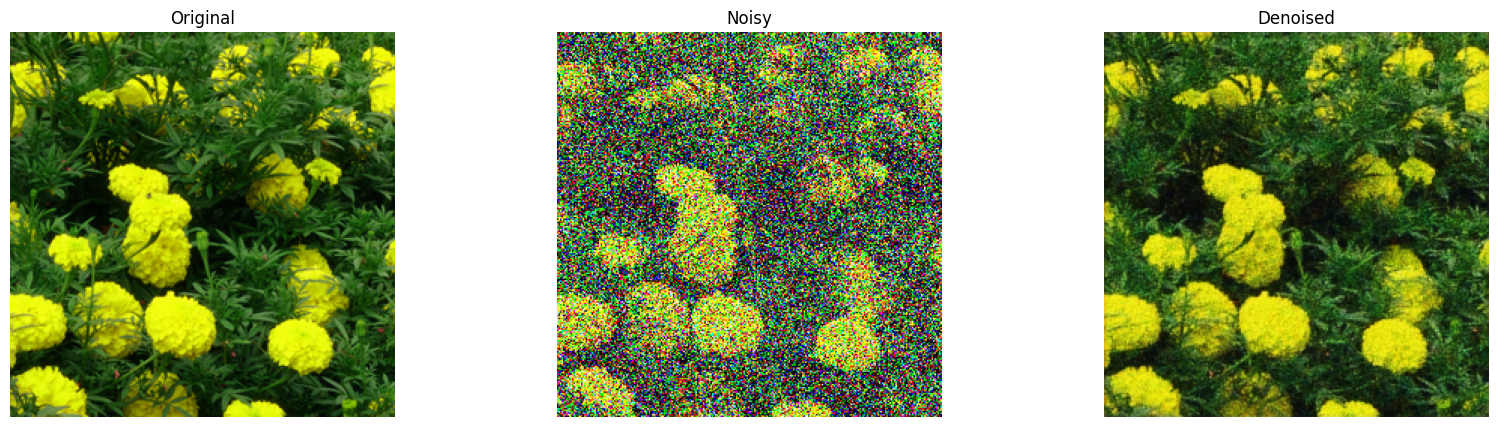

1/1 [==============================] - 0s 27ms/step


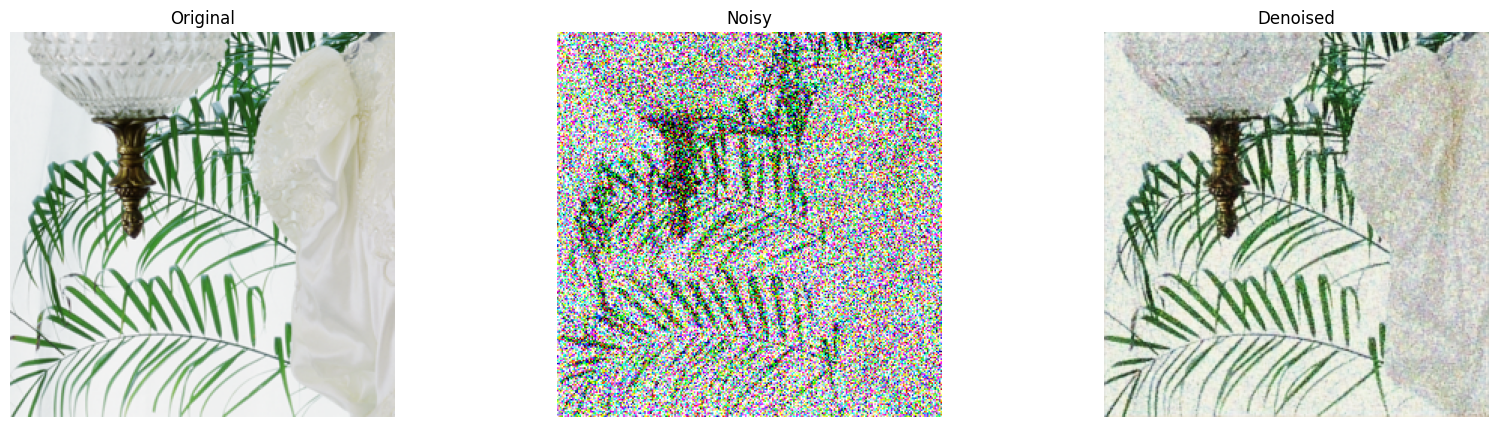

In [ ]:
import matplotlib.pyplot as plt

noise_factor = 0.2


x_test_noisy_custom2 = add_noise(x_test_custom1, noise_factor,sigma)

def plot_images(original, noisy, denoised):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].imshow(original)
    axes[0].set_title("Original")
    axes[0].axis("off")
    axes[1].imshow(noisy)
    axes[1].set_title("Noisy")
    axes[1].axis("off")
    axes[2].imshow(denoised)
    axes[2].set_title("Denoised")
    axes[2].axis("off")
    plt.show()

# Test the trained model on a custom test image
test_image_idx = np.random.randint(0, len(x_test_custom1))
original_img_custom = x_test_custom1[test_image_idx]
noisy_img_custom2 = x_test_noisy_custom2[test_image_idx]
noisy_img_custom = x_test_noisy_custom1[test_image_idx]

noisy_img_batch_custom = np.expand_dims(noisy_img_custom, axis=0)
denoised_img_batch_custom = unet_model.predict(noisy_img_batch_custom)
denoised_img_custom = denoised_img_batch_custom[0]


plot_images(original_img_custom, noisy_img_custom2, denoised_img_custom)
test_image_idx = np.random.randint(0, len(x_test_custom1))
original_img_custom = x_test_custom1[test_image_idx]
noisy_img_custom2 = x_test_noisy_custom2[test_image_idx]
noisy_img_custom = x_test_noisy_custom1[test_image_idx]

noisy_img_batch_custom = np.expand_dims(noisy_img_custom, axis=0)
denoised_img_batch_custom = unet_model.predict(noisy_img_batch_custom)
denoised_img_custom = denoised_img_batch_custom[0]
plot_images(original_img_custom, noisy_img_custom2, denoised_img_custom)

sigma=75

In [ ]:
def add_noise(data, noise_factor, sigma):
    n = np.random.normal(loc=0.0, scale=sigma, size=data.shape)
    data_noisy = data + noise_factor * (n/40)
    return np.clip(data_noisy, 0.0, 1.0)

In [ ]:
# Add noise to the images
noise_factor = 0.04
sigma=75

x_test_noisy_custom2 = add_noise(x_test_custom1, noise_factor,sigma)

In [ ]:

def compute_psnr(original, denoised):
    return peak_signal_noise_ratio(original, denoised)

def compute_ssim(original, denoised):
    return structural_similarity(original, denoised, multichannel=True)

# Use the model to denoise the test dataset
#x_test_denoised = unet_model.predict(x_test_noisy_custom)
# Use the model to denoise the test dataset one image at a time
x_test_denoised = []

for i in range(len(x_test_noisy_custom1)):
    img = x_test_noisy_custom2[i]
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    denoised_img = unet_model.predict(img)
    denoised_img = np.squeeze(denoised_img, axis=0)  # Remove the batch dimension
    x_test_denoised.append(denoised_img)

x_test_denoised = np.array(x_test_denoised)


# Compute the PSNR and SSIM for each test image and store them in lists
psnrs = []
ssims = []

for i in range(len(x_test_denoised)):
    original = x_test_custom1[i]
    denoised = x_test_denoised[i]
    psnrs.append(compute_psnr(original, denoised))
    ssims.append(compute_ssim(original, denoised))

# Compute the average PSNR and SSIM for the test dataset
average_psnr = np.mean(psnrs)
average_ssim = np.mean(ssims)

print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)

1/1 [==============================] - 0s 22ms/step


<ipython-input-200-82ac744262b7>:5: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(original, denoised, multichannel=True)


Average PSNR: 28.010317863521045
Average SSIM: 0.8768359


sigma=50

In [ ]:
# Add noise to the images
noise_factor = 0.04
sigma=50

x_test_noisy_custom2 = add_noise(x_test_custom1, noise_factor,sigma)

In [ ]:

def compute_psnr(original, denoised):
    return peak_signal_noise_ratio(original, denoised)

def compute_ssim(original, denoised):
    return structural_similarity(original, denoised, multichannel=True)

# Use the model to denoise the test dataset
#x_test_denoised = unet_model.predict(x_test_noisy_custom)
# Use the model to denoise the test dataset one image at a time
x_test_denoised = []

for i in range(len(x_test_noisy_custom1)):
    img = x_test_noisy_custom2[i]
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    denoised_img = unet_model.predict(img)
    denoised_img = np.squeeze(denoised_img, axis=0)  # Remove the batch dimension
    x_test_denoised.append(denoised_img)

x_test_denoised = np.array(x_test_denoised)


# Compute the PSNR and SSIM for each test image and store them in lists
psnrs = []
ssims = []

for i in range(len(x_test_denoised)):
    original = x_test_custom1[i]
    denoised = x_test_denoised[i]
    psnrs.append(compute_psnr(original, denoised))
    ssims.append(compute_ssim(original, denoised))

# Compute the average PSNR and SSIM for the test dataset
average_psnr = np.mean(psnrs)
average_ssim = np.mean(ssims)

print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)

1/1 [==============================] - 0s 19ms/step


<ipython-input-203-82ac744262b7>:5: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(original, denoised, multichannel=True)


Average PSNR: 29.632392340292718
Average SSIM: 0.92068356


sigma=35

In [ ]:
# Add noise to the images
noise_factor = 0.022
sigma=35

x_test_noisy_custom2 = add_noise(x_test_custom1, noise_factor,sigma)

In [ ]:

def compute_psnr(original, denoised):
    return peak_signal_noise_ratio(original, denoised)

def compute_ssim(original, denoised):
    return structural_similarity(original, denoised, multichannel=True)

# Use the model to denoise the test dataset
#x_test_denoised = unet_model.predict(x_test_noisy_custom)
# Use the model to denoise the test dataset one image at a time
x_test_denoised = []

for i in range(len(x_test_noisy_custom1)):
    img = x_test_noisy_custom2[i]
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    denoised_img = unet_model.predict(img)
    denoised_img = np.squeeze(denoised_img, axis=0)  # Remove the batch dimension
    x_test_denoised.append(denoised_img)

x_test_denoised = np.array(x_test_denoised)


# Compute the PSNR and SSIM for each test image and store them in lists
psnrs = []
ssims = []

for i in range(len(x_test_denoised)):
    original = x_test_custom1[i]
    denoised = x_test_denoised[i]
    psnrs.append(compute_psnr(original, denoised))
    ssims.append(compute_ssim(original, denoised))

# Compute the average PSNR and SSIM for the test dataset
average_psnr = np.mean(psnrs)
average_ssim = np.mean(ssims)

print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)

1/1 [==============================] - 0s 28ms/step


<ipython-input-212-82ac744262b7>:5: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(original, denoised, multichannel=True)


Average PSNR: 31.041889689737072
Average SSIM: 0.94954723


sigma=25

In [ ]:
# Add noise to the images
noise_factor = 0.01
sigma=25

x_test_noisy_custom2 = add_noise(x_test_custom1, noise_factor,sigma)

In [ ]:

def compute_psnr(original, denoised):
    return peak_signal_noise_ratio(original, denoised)

def compute_ssim(original, denoised):
    return structural_similarity(original, denoised, multichannel=True)

# Use the model to denoise the test dataset
#x_test_denoised = unet_model.predict(x_test_noisy_custom)
# Use the model to denoise the test dataset one image at a time
x_test_denoised = []

for i in range(len(x_test_noisy_custom1)):
    img = x_test_noisy_custom2[i]
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    denoised_img = unet_model.predict(img)
    denoised_img = np.squeeze(denoised_img, axis=0)  # Remove the batch dimension
    x_test_denoised.append(denoised_img)

x_test_denoised = np.array(x_test_denoised)


# Compute the PSNR and SSIM for each test image and store them in lists
psnrs = []
ssims = []

for i in range(len(x_test_denoised)):
    original = x_test_custom1[i]
    denoised = x_test_denoised[i]
    psnrs.append(compute_psnr(original, denoised))
    ssims.append(compute_ssim(original, denoised))

# Compute the average PSNR and SSIM for the test dataset
average_psnr = np.mean(psnrs)
average_ssim = np.mean(ssims)

print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)

1/1 [==============================] - 0s 21ms/step


<ipython-input-216-82ac744262b7>:5: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(original, denoised, multichannel=True)


Average PSNR: 31.28391921905872
Average SSIM: 0.95394397


sigma=15

In [ ]:
# Add noise to the images
noise_factor = 0.001
sigma=15

x_test_noisy_custom2 = add_noise(x_test_custom1, noise_factor,sigma)

In [ ]:

def compute_psnr(original, denoised):
    return peak_signal_noise_ratio(original, denoised)

def compute_ssim(original, denoised):
    return structural_similarity(original, denoised, multichannel=True)

# Use the model to denoise the test dataset
#x_test_denoised = unet_model.predict(x_test_noisy_custom)
# Use the model to denoise the test dataset one image at a time
x_test_denoised = []

for i in range(len(x_test_noisy_custom1)):
    img = x_test_noisy_custom2[i]
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    denoised_img = unet_model.predict(img)
    denoised_img = np.squeeze(denoised_img, axis=0)  # Remove the batch dimension
    x_test_denoised.append(denoised_img)

x_test_denoised = np.array(x_test_denoised)


# Compute the PSNR and SSIM for each test image and store them in lists
psnrs = []
ssims = []

for i in range(len(x_test_denoised)):
    original = x_test_custom1[i]
    denoised = x_test_denoised[i]
    psnrs.append(compute_psnr(original, denoised))
    ssims.append(compute_ssim(original, denoised))

# Compute the average PSNR and SSIM for the test dataset
average_psnr = np.mean(psnrs)
average_ssim = np.mean(ssims)

print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)

1/1 [==============================] - 0s 19ms/step


<ipython-input-249-82ac744262b7>:5: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return structural_similarity(original, denoised, multichannel=True)


Average PSNR: 31.311152927705265
Average SSIM: 0.9544507
